In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr

import datetime

From csv.  Import lemonade csv.

In [2]:
url = """https://gist.githubusercontent.com/ryanorsinger/6af5008fa40071d8b0e064655c2886ef/raw/389449c3c96959e97e38f5b93d7d6e69d3455b6a/lemonade.csv"""
df = pd.read_csv(url)

Examine the dataframe

In [3]:
print(df.shape)
describe = pd.DataFrame(df.describe())
print(df.info())
print(describe)
df.head(2)

(365, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB
None
       Temperature    Rainfall      Flyers  Price       Sales
count   365.000000  365.000000  365.000000  365.0  365.000000
mean     61.224658    0.825973   40.104110    0.5   27.589041
std      18.085892    0.273890   13.786445    0.0   29.979680
min      15.100000    0.400000  -38.000000    0.5    7.000000
25%      49.700000    0.650000   31.000000    0.5   20.000000
50%      61.100000    0.740000   39.000000    0.5   25.000000
75%      71.700000    0.910000   49.000000    0.5   30.000000
max     212.000000    2.500000   80.000000    0.5  534.000000


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13


- 1a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [4]:
# turn date into datetime column using import
df.Date = pd.to_datetime(df.Date)

In [7]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [8]:
# find continuous variables:
for col in df.columns:
    print(col + ":")
    print(df[col].dtype)
    print(df[col].value_counts().count())
    
#Temperature, Rainfall, Flyers, and Sales are continuous

Date:
datetime64[ns]
365
Day:
object
7
Temperature:
float64
176
Rainfall:
float64
35
Flyers:
int64
63
Price:
float64
1
Sales:
int64
39


In [9]:
iqr(df.Temperature), df.Temperature.quantile(.25)

(22.0, 49.7)

Range Rule:
- lower inner fence: Q1 - 1.5*IQR
- upper inner fence: Q3 + 1.5*IQR
- lower outer fence: Q1 - 3*IQR
- upper outer fence: Q3 + 3*IQR

In [10]:
# # def range_rule(df, inner=1.5, outer=3):
# for col in ['Temperature'] :
#     inner = 1.5
#     outer = 3
#     lower_inner = df.quantile(.25) + (iqr(df[col]) * inner)
#     lower_outer = df.quantile(.25) + (iqr(df[col]) * outer)
#     upper_inner = df.quantile(.75) + (iqr(df[col]) * inner)
#     upper_outer = df.quantile(.25) + (iqr(df[col]) * outer)
#     print(f'For colulmn {col}: lower_inner= {lower_inner}, lower_outer= {lower_outer}')
#     print(f'For colulmn {col}: upper_inner= {upper_inner}, upper_outer= {upper_outer}')

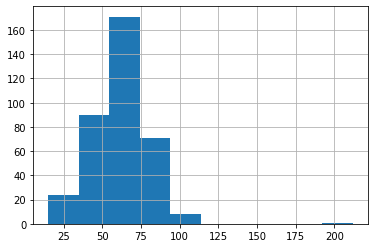

In [13]:
df.Temperature.hist()

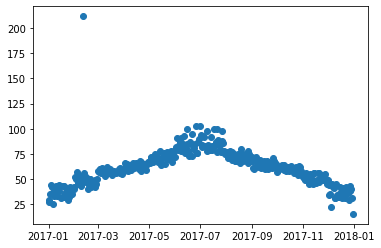

In [18]:
plt.scatter(x='Date', y= 'Temperature', data=df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null datetime64[ns]
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.1+ KB


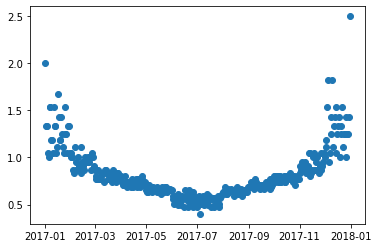

In [20]:
plt.scatter(x = df.Date, y=df.Rainfall )

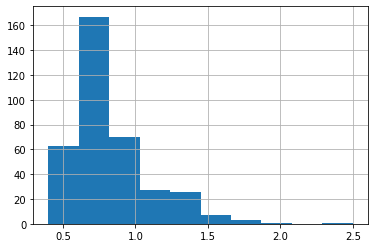

In [21]:
df.Rainfall.hist()

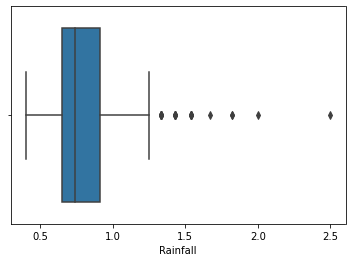

In [22]:
sns.boxplot(df.Rainfall)

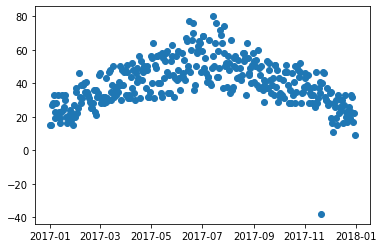

In [24]:
plt.scatter(x=df.Date, y=df.Flyers)